# BOT DETECTION MODEL

### Problem Statement : Build A Model that can detect the Non Human Traffic present in a website!!!

### Why do we need to detect Bots ?
 No matter how big your website is, you’re almost guaranteed to receive bot traffic at some point. These bots are often up to a range of different things on your site, from indexing web pages to scraping your content. With so many different bots out there, how can you detect bot traffic on your website? And should you be concerned?

# Here are 5 reasons that why do need BOT Detection ?


1)Bots can steal your content. You know that content you worked so hard to develop? Your carefully crafted blog posts and pages? All that effort could be wasted in a second if you let bots access your site. Bots can scrape your website for data, information and even pricing in just a matter of minutes. Then, it can be used on other sites, redistributed or even sold for profit in other areas of the web.

2)Bots can slow down your site. Bots bog down your site and overwhelm it with inauthentic, fraudulent traffic. This results in slower page load times for your actual paying customers, which could affect their level of satisfaction or even deter them from buying or visiting altogether.

3)Bots can threaten your website. Malicious bots can hack your website, insert inappropriate links and content, or even crash your site altogether. This can hurt your traffic, your customers and your sales.

4)Bot can take up extra time and money. Many bots spend their time posting spam comments to websites and blogs. While this may not seem like a huge issue, it can be quite frustrating. You’ll have to spend hours each month sorting through these comments to separate the human commenters from the fraudulent ones, which takes you and your resources away from actually running your business. If you don’t remove these spam comments, they end up annoying your readers and possibly leading them away from your site.

5)Bots can mess up your analytics. Analytics are hugely important to a website owner. They tell you how your site is performing, where traffic is coming from and what you might want to tweak throughout the site. Unfortunately, if you have a significant amount of bots accessing your site, this can throw your analytics into upheaval. You won’t have a clear picture of your site’s performance or your next steps for improvement, and you won’t be able to tell what’s real and what’s fake.

# The 5-Step Methodology for Spotting Malicious Bot Activity

1)Separate bots from people

2)Distinguish between browsers and other clients

3)Distinguish between bots within browsers

4)Analyze the payload

5)Determine a target's risk

# Import Essential Data

In [1]:
# importing essential packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
# read csv
df = pd.read_csv('Bot detection data.csv')
df.head(3)
df.sort_values('VISIT',ascending=False,axis=0)[:5]

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts
879695,879695,India,India-South Asia,Asia Pacific,BENGALURU,KARNATAKA,ARTECHINFO.IN,NaN,MICROSOFT_WINDOWS7,80a4a0749b39a6edc78f32f6424a632659ec6f4013a304...,MOZILLA/5.0 (WINDOWS NT 6.1) APPLEWEBKIT/537.3...,1195,694,1196,www-01.ibm.com/procurement/csa/protect/gateway...,11,3,2019,2019-06-04 08:27:20.032300
50894,50894,India,India-South Asia,Asia Pacific,VISAKHAPATNAM,ANDHRA PRADESH,NaN,NaN,MICROSOFT_WINDOWS7,f81ff9706f756e3fc48cc25d4c6b944f71be2baffd0907...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,788,318,806,www-01.ibm.com/procurement/csa/protect/gateway...,11,3,2019,2019-06-04 21:35:40.038800
1040366,1040366,United States,United States,North America,LANSING,MICHIGAN,NaN,NaN,MICROSOFT_WINDOWS10,1d2c701bcd0b90fafff3fd272833825622cca9e08078ee...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,517,102,557,align.ustream.tv/channel/23603974/playlist/365397,11,3,2019,2019-06-04 16:23:28.061400
987058,987058,India,India-South Asia,Asia Pacific,KORAMANGALA,KARNATAKA,NaN,NaN,MICROSOFT_WINDOWS10,bd30d0ba1fa23e8cf2e668769535ccfd3b422554de8c3e...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,476,217,476,www-01.ibm.com/procurement/csa/protect/gateway...,11,3,2019,2019-06-04 19:18:03.009700
488270,488270,Israel,SPGI,Europe,PETAH TIKVA,HAMERKAZ,BEZEQINT.NET,NaN,MICROSOFT_WINDOWS7,831c08edddad5d10fc4c5904876a27ac12ef571031b954...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,463,0,463,careers.ibm.com/listjobs/all/search/city/haifa...,11,3,2019,2019-06-04 09:25:41.091800


profile = ProfileReport(df, title='Pandas Profiling Report')
profile

In [3]:
# viewing unique values
for i in df.columns:
    print('Name of Variable    : ',i)
    print('No. of unique values: ',len(df[i].unique()))
    print(df[i].unique())
    print("\n")

Name of Variable    :  Unnamed: 0
No. of unique values:  1048573
[      0       1       2 ... 1048570 1048571 1048572]


Name of Variable    :  ctry_name
No. of unique values:  220
['United States' 'Japan' 'Brazil' 'France' 'Singapore' 'Switzerland'
 'Korea, Republic of' 'India' 'Italy' 'Germany' 'Ecuador' 'Denmark'
 'China' 'United Kingdom' 'Hong Kong' 'Canada' 'Mexico' 'Kenya' 'Colombia'
 'Egypt' 'Russian Federation' 'United Arab Emirates' 'Finland'
 'Philippines' 'Tunisia' 'Ireland' 'Slovenia' 'Australia'
 'Bolivia, Plurinational State of' 'Czech Republic' 'Spain' 'Indonesia'
 'Moldova, Republic of' 'Turkey' 'Argentina' 'French Polynesia' 'Taiwan'
 'Sudan' 'Israel' 'Sweden' 'Netherlands' 'Sri Lanka' 'Pakistan' 'Chile'
 'Guatemala' 'South Africa' 'Morocco' 'Zimbabwe' 'Bulgaria' 'Hungary'
 'Estonia' 'Viet Nam' 'Poland' 'Peru' 'Iceland' 'Belgium' 'Thailand'
 'Botswana' 'Norway' 'Austria' 'Malaysia' 'Panama' 'Portugal'
 'Saudi Arabia' 'Northern Mariana Islands' 'Greece' 'Romania' 'Serbi

No. of unique values:  329692
['www.ibm.com/watson/campaign' 'www.ibm.com/privacy/us/en'
 'www.ibm.com/account/reg/us-en/signup?formid=urx-32628' ...
 'align.ustream.tv/channel/23549815/video/115707795'
 'www-01.ibm.com/support/docview.wss?uid=nas8n1021616'
 'www.ibm.com/support/knowledgecenter/en/search/ftp%20ls']


Name of Variable    :  wk
No. of unique values:  1
[11]


Name of Variable    :  mth
No. of unique values:  1
[3]


Name of Variable    :  yr
No. of unique values:  1
[2019]


Name of Variable    :  page_vw_ts
No. of unique values:  1038809
['2019-06-04 05:05:18.023100' '2019-06-04 05:07:11.014300'
 '2019-06-04 05:08:46.081900' ... '2019-06-04 13:40:47.060500'
 '2019-06-04 13:22:12.001900' '2019-06-04 13:39:50.074200']




#pip install device_detector

In [4]:
#Droping similar values
df = df.drop(['wk','mth','yr','Unnamed: 0'],axis=1)

In [5]:
#counting unique values in sec_lvl_domine
df["sec_lvl_domn"].value_counts()[:10]

COMCAST.NET            26815
RR.COM                 16337
VERIZON.NET            10800
SBCGLOBAL.NET          10783
MYVZW.COM               8285
ACTCORP.IN              6861
COX.NET                 6591
GOOGLE.COM              6269
COMCASTBUSINESS.NET     6041
OCN.NE.JP               5886
Name: sec_lvl_domn, dtype: int64

In [6]:
#checking for null values
print(df.shape)
df.isnull().sum()

(1048573, 15)


ctry_name                           0
intgrtd_mngmt_name                  0
intgrtd_operating_team_name         0
city                            46586
st                              45445
sec_lvl_domn                   319457
device_type                    842041
operating_sys                    1820
ip_addr                             0
user_agent                          6
VISIT                               0
ENGD_VISIT                          0
VIEWS                               0
page_url                            1
page_vw_ts                       2743
dtype: int64

# Data Cleaning

In [7]:
#df = df.drop('Unnamed: 0',axis=1)
# Null value is high
df['device_type'] = df['device_type'].fillna('Unknown')
df['city'] = df['city'].fillna('Unknown')
df['st'] = df['st'].fillna('Unknown')
df['sec_lvl_domn'] = df['sec_lvl_domn'].fillna('Unknown')
# Null Value is low
df['operating_sys'] = df['operating_sys'].fillna(df['operating_sys'].mode()[0])
df['page_vw_ts'] = df['page_vw_ts'].fillna(df['page_vw_ts'].mode()[0])
df['page_url'] = df['page_url'].fillna(df['page_url'].mode()[0])
df['user_agent'] = df['user_agent'].fillna(df['user_agent'].mode()[0])

In [8]:
df.isnull().sum()
#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048573 entries, 0 to 1048572
Data columns (total 15 columns):
ctry_name                      1048573 non-null object
intgrtd_mngmt_name             1048573 non-null object
intgrtd_operating_team_name    1048573 non-null object
city                           1048573 non-null object
st                             1048573 non-null object
sec_lvl_domn                   1048573 non-null object
device_type                    1048573 non-null object
operating_sys                  1048573 non-null object
ip_addr                        1048573 non-null object
user_agent                     1048573 non-null object
VISIT                          1048573 non-null int64
ENGD_VISIT                     1048573 non-null int64
VIEWS                          1048573 non-null int64
page_url                       1048573 non-null object
page_vw_ts                     1048573 non-null object
dtypes: int64(3), object(12)
memory usage: 120.0+ MB


In [9]:
df.columns

Index(['ctry_name', 'intgrtd_mngmt_name', 'intgrtd_operating_team_name',
       'city', 'st', 'sec_lvl_domn', 'device_type', 'operating_sys', 'ip_addr',
       'user_agent', 'VISIT', 'ENGD_VISIT', 'VIEWS', 'page_url', 'page_vw_ts'],
      dtype='object')

seperating day, month & year on page visit

In [10]:
from datetime import datetime, time
#datetime.strptime('2019-06-04 05:05:18.023100', '%Y-%m-%d %H:%M:%S.%f').day
#datetime.strptime('2019-06-04 05:05:18.023100', '%Y-%m-%d %H:%M:%S.%f').month
#datetime.strptime('2019-06-04 05:05:18.023100', '%Y-%m-%d %H:%M:%S.%f').year
df['pg_vw_day']   = df['page_vw_ts'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').day)
df['pg_vw_month'] = df['page_vw_ts'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').month)
df['pg_vw_year']  = df['page_vw_ts'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').year)
df['timeinsecond']= df['page_vw_ts'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').timestamp())
df_1 = df.drop('page_vw_ts',axis = 1)
df_1.head(3)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,pg_vw_day,pg_vw_month,pg_vw_year,timeinsecond
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,4,6,2019,1.559605e+09
1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,4,6,2019,1.559605e+09
2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,4,6,2019,1.559605e+09


In [11]:
#defining year & month as integer for further process
df['pg_vw_month'] = df['pg_vw_month'].astype(str)
df['pg_vw_year'] = df['pg_vw_year'].astype(str)
df['period'] = df['pg_vw_month'].str.cat(df['pg_vw_year'], sep =".") 
df['pg_vw_month'] = df['pg_vw_month'].astype(int)
df['pg_vw_year'] = df['pg_vw_year'].astype(int)
#df['period']

# Bot Detection

First, we need to detect the bot

In [12]:
df.head(3)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,page_vw_ts,pg_vw_day,pg_vw_month,pg_vw_year,timeinsecond,period
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,2019-06-04 05:05:18.023100,4,6,2019,1.559605e+09,6.2019
1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,2019-06-04 05:07:11.014300,4,6,2019,1.559605e+09,6.2019
2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,2019-06-04 05:08:46.081900,4,6,2019,1.559605e+09,6.2019


In [13]:
# masking the column which has many view per visit
# because humans has some limit. i taken 3 view is max per visit. 
#most of the people will not view more than 3 views per visit
mask = (((3*df['VISIT'])<df['ENGD_VISIT']) | ((3*df['VISIT'])<df['VIEWS']))
print(mask.unique())
mask.value_counts()#describe()

[False  True]


False    1028368
True       20205
dtype: int64

In [14]:
#naming that mask with 1 as bot
df['bot'] = np.where(mask,1,0)
df['bot'].value_counts()

0    1028368
1      20205
Name: bot, dtype: int64

In [15]:
#viewing bot only
df_b1 = df.copy()
df_b1 = df_b1[['ip_addr','VISIT','ENGD_VISIT','VIEWS','bot']]
print(df_b1.shape)
#df_b1.head(2)
df_b1.loc[df_b1['bot']==1].head()

(1048573, 5)


,ip_addr,VISIT,ENGD_VISIT,VIEWS,bot
40,9411effb3d1c9644d4bc14f092d69428aba2d8cb834594...,1,0,6,1
148,7a5107056137f31d11f88e15107bf1595b81b6802f33ff...,1,1,4,1
207,867c245be29981ab7e05a45f3d55822d05f2345695d0e2...,1,1,4,1
252,5f57ff161243f89daa1dad4ea6821edeb004f31d8e9954...,1,1,6,1
258,f4b7f51cfa55482c87fe09393be43defada3ed136a6b9a...,2,2,15,1


In [16]:
#viewing which ip is bot & their visit count
ip_high_fre = df_b1['ip_addr'].value_counts()
ip_high_fre[:5]

b8a8233899cbd26ba1e2207af00ed76f6d3a2393f9967aa43bd4676d264a2894    1777
0ec667e87013e1398ddaa61c14f7118f0dd6adc9abc2a2a0608545b59960fdc9     735
1efe766ebdcd5b9065d8ae9c5e2070201d8ca83768809009f4da5a78dc8acc14     598
c97c81d31fb39cbba79f371dcc09accdb345084c0eb0a3efc146446bce14aead     511
a652f03df170d22eaeb7c665ddd4f7caf5b715adfcca4bd719188e0c3479af5f     476
Name: ip_addr, dtype: int64

In [17]:
#grouping by ip adress & naming ip which is detected bot is applied to all
df_gb = df_b1.groupby(['ip_addr'],axis=0).agg({'VISIT':np.sum,'ENGD_VISIT':np.sum,'VIEWS':np.sum,'bot':np.sum}).reset_index()
df_gb['bot'] = df_gb['bot'].replace(range(1,df_gb['bot'].max()+1),1)
print(df_gb['bot'].unique())
print(df_gb.shape)
df_gb.sort_values('bot',ascending=False)[:5]

[0 1]
(450602, 5)


,ip_addr,VISIT,ENGD_VISIT,VIEWS,bot
439980,f9ea77612c10d736c2e3744a6623bcd11c5a6c9be1fd2e...,1,1,4,1
16423,095dce82441b60e612abd10ef2f356451b9387127eeed2...,1,0,4,1
237246,86f3fdd80cd80cf2bdb67279ea07095123bf45dd9e6759...,62,27,75,1
312462,b1ad289e7ece0453d6778c1042ff69a8c7be723c00323f...,26,11,39,1
422017,efb91c596e577ab5081b5428fa20dc8302f4bc04eb0799...,20,11,30,1


In [18]:
#the ip with more frequent visit is also a bot. 
#because human has some interst & they very less posibility that human visit this kind of website frequently
df_gb1 = df_gb.copy()
mask = (((3*df_gb1['VISIT'])<df_gb1['ENGD_VISIT']) | ((3*df_gb1['VISIT'])<df_gb1['VIEWS']))
print(mask.unique())
mask.value_counts()

[False  True]


False    447471
True       3131
dtype: int64

In [19]:
#viewing 1--> bots & 0 --> humans
print(df_gb['bot'].value_counts())
df_gb1['bot'] = np.where(mask,1,0)
df_gb1['bot'].value_counts()

0    436771
1     13831
Name: bot, dtype: int64


0    447471
1      3131
Name: bot, dtype: int64

For bot detection, our peiority is to detect all bot even if there is wrong

In [20]:
#merging data to name as bot
mg = pd.merge(df_gb,df_gb1,left_on=df_gb['ip_addr'],right_on=df_gb1['ip_addr'])
mg[['ip_addr_x','bot_x','bot_y']].head()

,ip_addr_x,bot_x,bot_y
0,00000bfd838fedd4c2adff293a64d5efa3406b27053a10...,0,0
1,00002f7fddaa273634e38ec7004224498baa7a46cf2640...,0,0
2,0000694257f2882ccebb6a5431a8ebca19063252492891...,0,0
3,0000a229c86f8baa193ffdcf9c2a88f83a91b9faad73f7...,0,0
4,0000faf7927142fa7fbc189d4a1bf23e4eb0c8d3b49c62...,0,0


In [21]:
#finally ip with frequent visit is determined as Bot
mg['bot_1'] = mg['bot_y']+mg['bot_y']
mg['bot_1'] = mg['bot_1'].replace(range(1,mg['bot_1'].max()+1),1)
mg['bot_1'].sort_values(ascending=False)[:5]
df_gb2 = mg[['ip_addr_x','bot_1']]
df_gb2.head(3)

,ip_addr_x,bot_1
0,00000bfd838fedd4c2adff293a64d5efa3406b27053a10...,0
1,00002f7fddaa273634e38ec7004224498baa7a46cf2640...,0
2,0000694257f2882ccebb6a5431a8ebca19063252492891...,0


In [22]:
df.head(1)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,...,ENGD_VISIT,VIEWS,page_url,page_vw_ts,pg_vw_day,pg_vw_month,pg_vw_year,timeinsecond,period,bot
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,...,0,1,www.ibm.com/watson/campaign,2019-06-04 05:05:18.023100,4,6,2019,1.559605e+09,6.2019,0


In [23]:
#mapping that ip to core data for further process
df_1 = pd.merge(df,df_gb2,how='left',right_on='ip_addr_x',left_on='ip_addr',copy=False)         
#df_1.head(3)

In [24]:
df_1['Bot'] = df_1['bot']+df_1['bot_1']
df_1 = df_1.drop(['bot','bot_1','ip_addr_x'],axis=1)
df_1['Bot'] = df_1['Bot'].replace(range(1,df_1['Bot'].max()+1),1)
df_1.sort_values('Bot',ascending=False)[:3]
#df_1.head(3)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,...,ENGD_VISIT,VIEWS,page_url,page_vw_ts,pg_vw_day,pg_vw_month,pg_vw_year,timeinsecond,period,Bot
136032,Japan,Japan,Japan,CHIYODA-KU,TOKYO,Unknown,Unknown,MICROSOFT_WINDOWS7,3568cb4a465ccf6103e4115e3b74fb7102434daea8c958...,MOZILLA/5.0 (WINDOWS NT 6.1) APPLEWEBKIT/537.3...,...,3,7,www-06.ibm.com/ibm/support/jp/dhrm/dhrmbp.nsf/...,2019-06-04 15:21:27.077200,4,6,2019,1.559642e+09,6.2019,1
690172,United States,United States,North America,Unknown,Unknown,TRACKERMARINE.COM,Unknown,MICROSOFT_WINDOWS10,a0df61028d9cbdde114da9bfb07f475537ba6bd0ddaf39...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,...,1,5,www.ibm.com/support/knowledgecenter/ss6pew_9.5...,2019-06-04 06:22:13.074500,4,6,2019,1.559610e+09,6.2019,1
817752,United States,United States,North America,EAST MOLINE,ILLINOIS,216.EDUNET,MOBILEPHONE,IOS_12.1,11c4fa4d58aebd76cf7f0b70eb4afb8d8e6db17de67a25...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1 LIKE M...,...,0,4,www.ibm.com/thought-leadership/smart,2019-06-04 14:16:42.046600,4,6,2019,1.559638e+09,6.2019,1


# Sample data
Data is so large & it takes long time to compute. So, im taking sample from that data

In [65]:
sam_data = df_1.sample(frac=.25,random_state=1)
print(sam_data.shape)
sam_data['Bot'].value_counts()

(262143, 21)


0    255680
1      6463
Name: Bot, dtype: int64

## High Frequency of visit based on month

In [66]:
df_p = sam_data[['ip_addr','period','VISIT']]
df_pp = pd.pivot_table(df_p,values='VISIT',index =['ip_addr'],columns =['period'], aggfunc = np.sum).reset_index()
df_pp["sum_visit"] = df_pp.sum(axis = 1, skipna = True)
df_pp[:2]

period,ip_addr,1.2018,11.2018,12.2001,12.2012,12.2018,2.2019,3.2019,4.2019,5.2019,6.2011,6.2016,6.2019,7.2019,8.2018,8.2019,sum_visit
0,00000bfd838fedd4c2adff293a64d5efa3406b27053a10...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
1,0000694257f2882ccebb6a5431a8ebca19063252492891...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [67]:
# frequent visit of ip is determined & determined as bot
df_pp['bot'] = 0
for i in df_pp.columns[1:-2]:     #Index(['11.2018', '12.2018', '5.2019', '6.2019'], dtype='object', name='period')
    mask = ((df_pp[i]>10) | (df_pp['sum_visit']>40))
    df_pp['bot'] = np.where(mask,1,0) 

df_c = df_pp[['ip_addr','bot']]
df_pp[:1]

period,ip_addr,1.2018,11.2018,12.2001,12.2012,12.2018,2.2019,3.2019,4.2019,5.2019,6.2011,6.2016,6.2019,7.2019,8.2018,8.2019,sum_visit,bot
0,00000bfd838fedd4c2adff293a64d5efa3406b27053a10...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0


In [68]:
df_pp.columns[1:-2]

Index(['1.2018', '11.2018', '12.2001', '12.2012', '12.2018', '2.2019',
       '3.2019', '4.2019', '5.2019', '6.2011', '6.2016', '6.2019', '7.2019',
       '8.2018', '8.2019'],
      dtype='object', name='period')

In [69]:
#mapping to sourse data
df_2 = pd.merge(sam_data,df_c,how='left',right_on='ip_addr',left_on='ip_addr',copy=False)
df_2.head(2)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,...,VIEWS,page_url,page_vw_ts,pg_vw_day,pg_vw_month,pg_vw_year,timeinsecond,period,Bot,bot
0,Italy,Italy,Europe,ROMA,ROMA,Unknown,MOBILEPHONE,IOS_12.1.4,6984db784d5c2b12af23ed7dbccb5511a4038b9da629b0...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,...,1,www-03.ibm.com/press/it/it/resources.wss,2019-06-04 09:17:12.070600,4,6,2019,1.559620e+09,6.2019,0,0
1,United Kingdom,UKI,Europe,CLYDEBANK,WEST DUNBARTONSHIRE,VIRGINM.NET,MOBILEPHONE,ANDROID_6.0.1,7e34597f49144ed22808eaa80aeb8602bb455df0df5e65...,MOZILLA/5.0 (LINUX; ANDROID 6.0.1; SM-N910F) A...,...,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,2019-06-04 12:31:35.041000,4,6,2019,1.559632e+09,6.2019,0,0


In [70]:
df_2['Bot_data'] = df_2['Bot']+df_2['bot']
df_2['Bot_data'] = df_2['Bot'].fillna(0)
df_2['Bot_data'] = df_2['Bot'].astype(int)
df_2 = df_2.drop(['Bot','bot'],axis=1)

In [71]:
df_2['Bot_data'] = df_2['Bot_data'].replace(range(1,df_2['Bot_data'].max()+1),1)
df_2.sort_values('Bot_data',ascending=False)[:3]
df_2.shape
df_2['Bot_data'].value_counts()

0    255680
1      6463
Name: Bot_data, dtype: int64

In [72]:
sam_data['Bot'].value_counts()

0    255680
1      6463
Name: Bot, dtype: int64

In [73]:
data = df_2.copy()
data[:2]

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,...,ENGD_VISIT,VIEWS,page_url,page_vw_ts,pg_vw_day,pg_vw_month,pg_vw_year,timeinsecond,period,Bot_data
0,Italy,Italy,Europe,ROMA,ROMA,Unknown,MOBILEPHONE,IOS_12.1.4,6984db784d5c2b12af23ed7dbccb5511a4038b9da629b0...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,...,0,1,www-03.ibm.com/press/it/it/resources.wss,2019-06-04 09:17:12.070600,4,6,2019,1.559620e+09,6.2019,0
1,United Kingdom,UKI,Europe,CLYDEBANK,WEST DUNBARTONSHIRE,VIRGINM.NET,MOBILEPHONE,ANDROID_6.0.1,7e34597f49144ed22808eaa80aeb8602bb455df0df5e65...,MOZILLA/5.0 (LINUX; ANDROID 6.0.1; SM-N910F) A...,...,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,2019-06-04 12:31:35.041000,4,6,2019,1.559632e+09,6.2019,0


Ip_addr which has high frequency is identified as bot

#### Hence, bot were detected

# Visualization

plt.figure(figsize=[20,20])
sns.scatterplot(y = 'ip_addr',x = 'period',hue='Bot',data=sam_data)

#pip install user-agents

In [74]:
for i in data.columns:
    print('Name of Variable    : ',i)
    print('No. of unique values: ',len(data[i].unique()))
    print(data[i].unique())
    print("\n")

Name of Variable    :  ctry_name
No. of unique values:  211
['Italy' 'United Kingdom' 'Germany' 'France' 'United States'
 'Dominican Republic' 'Saudi Arabia' 'Philippines' 'Canada' 'Mexico'
 'Thailand' 'Russian Federation' 'Hong Kong' 'Turkey' 'India'
 'Netherlands' 'Australia' 'Japan' 'China' 'South Africa' 'Poland'
 'Argentina' 'Tunisia' 'Singapore' 'Brazil' 'Korea, Republic of'
 'Colombia' 'Egypt' 'Qatar' 'Switzerland' 'Morocco' 'Spain' 'Indonesia'
 'Macao' 'Croatia' 'Czech Republic' 'Taiwan'
 'Venezuela, Bolivarian Republic of' 'Pakistan' 'Belarus' 'Belgium'
 'Ukraine' 'United Arab Emirates' 'Romania' 'Greece' 'Ecuador' 'Serbia'
 'Viet Nam' 'Sweden' 'Slovenia' 'Denmark' 'Peru' 'Cyprus' 'Jamaica'
 'Malaysia' 'Bangladesh' 'Finland' 'Nigeria' 'Kenya' 'Portugal' 'Vanuatu'
 'Sri Lanka' 'Norway' 'Namibia' 'Ireland' 'Montenegro' 'Latvia'
 'Costa Rica' 'Chile' 'Austria' 'Bosnia and Herzegovina' 'Albania'
 'New Zealand' 'Hungary' 'Honduras' 'Guatemala' 'Slovakia' 'Cambodia'
 'Bulgaria' 'Kuw

No. of unique values:  114451
['www-03.ibm.com/press/it/it/resources.wss'
 'www.ibm.com/account/reg/us-en/signup?formid=urx-35624'
 'www-946.ibm.com/support/servicerequest/newservicerequest.action' ...
 'www.ibm.com/support/knowledgecenter/en/sscqgf_7.1.0/com.ibm.ibmdi.doc_7.1/referenceguide82.htm'
 'www.ibm.com/support/knowledgecenter/pl/ssl3jx/admin/bss/topics/password_considerations.html'
 'www.ibm.com/support/knowledgecenter/en/ssulqd_1.7.2/com.ibm.nz.hdp.doc/t_hdp_install_pda.html']


Name of Variable    :  page_vw_ts
No. of unique values:  261007
['2019-06-04 09:17:12.070600' '2019-06-04 12:31:35.041000'
 '2019-06-04 01:41:13.036600' ... '2019-06-04 20:11:35.019900'
 '2019-06-04 19:37:02.094800' '2019-06-04 04:20:24.094000']


Name of Variable    :  pg_vw_day
No. of unique values:  22
[ 4  5  1  3 21 31 30 29 18 16 20 24 23 17  2  9 28 14 25 15  6  8]


Name of Variable    :  pg_vw_month
No. of unique values:  10
[ 6 11 12  5  4  7  8  3  2  1]


Name of Variable    :  pg_vw_year

### 1)Separate bots from people

In [75]:
#bot data
bot_data = data.loc[data['Bot_data']==1]
#People data
peo_data = data.loc[data['Bot_data']==0]

In [76]:
bot_data.head(2)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,...,ENGD_VISIT,VIEWS,page_url,page_vw_ts,pg_vw_day,pg_vw_month,pg_vw_year,timeinsecond,period,Bot_data
44,Australia,Australia/NZ,Asia Pacific,MELBOURNE,VICTORIA,OPTUSNET.COM.AU,Unknown,MICROSOFT_WINDOWS7,6fd377c578ef237e73c6a0acd5c9fb749d3b04279e18f6...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64; RV:65...,...,0,1,www-01.ibm.com/support/docview.wss?uid=swg2126...,2019-06-04 19:22:29.070800,4,6,2019,1.559656e+09,6.2019,1
60,India,India-South Asia,Asia Pacific,HYDERABAD,TELANGANA,CELONLABS.COM,Unknown,MICROSOFT_WINDOWS10,7b8f2dd2dc088e2de751bd2ee7ba5086c229d2d15155aa...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64; RV:6...,...,1,5,developer.ibm.com/recipes/tutorials/setup-priv...,2019-06-04 05:51:00.024500,4,6,2019,1.559608e+09,6.2019,1


In [77]:
peo_data.head(1)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,...,ENGD_VISIT,VIEWS,page_url,page_vw_ts,pg_vw_day,pg_vw_month,pg_vw_year,timeinsecond,period,Bot_data
0,Italy,Italy,Europe,ROMA,ROMA,Unknown,MOBILEPHONE,IOS_12.1.4,6984db784d5c2b12af23ed7dbccb5511a4038b9da629b0...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,...,0,1,www-03.ibm.com/press/it/it/resources.wss,2019-06-04 09:17:12.070600,4,6,2019,1.559620e+09,6.2019,0


### 2)Distinguish between browsers and other clients

In [78]:
# using package to detect browser from user agent
from device_detector import DeviceDetector
from device_detector import SoftwareDetector
data_bro = data[['ip_addr','user_agent','Bot_data','sec_lvl_domn','device_type','operating_sys','period']]

In [79]:
#devicedetector used to find the browser from the user agent
#data['bot_1'] = data['user_agent'].apply(lambda x: SoftwareDetector(x).parse().is_bot())
data_bro['Browser'] = data_bro['user_agent'].apply(lambda x: DeviceDetector(x).parse().client_name())
data_bro['Browser'].value_counts()[:2]

C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Chrome               144007
Internet Explorer     26562
Name: Browser, dtype: int64

In [80]:
#rare browsers & unknown browser
data_bro1 = data_bro.copy() 
data_bro_cnt = data_bro['Browser'].value_counts().reset_index()
lst = data_bro_cnt['index'].tolist()
#lst

In [81]:
#finging valid browser name
import re
r = re.compile(r'^[a-zA-Z ]*$')
bro = [s for s in lst if r.match(s)]
print(bro)

['Chrome', 'Internet Explorer', 'Firefox', 'Chrome Mobile', 'Mobile Safari', 'Microsoft Edge', 'Safari', 'Chrome Webview', 'Samsung Browser', 'Opera', 'Facebook', 'Chrome Mobile iOS', 'QQ Browser', 'MIUI Browser', 'UC Browser', 'Chromium', 'Firefox Mobile', '', 'Sogou Explorer', 'Android Browser', 'Yandex Browser', 'Mobile Silk', 'WeChat', 'Opera Mobile', 'Liebao', 'Maxthon', 'Vivaldi', 'Apple News', 'Coc Coc', 'Firefox Mobile iOS', 'Facebook Messenger', 'NetFront', 'Baidu Spark', 'Oppo Browser', 'Line', 'Puffin', 'Iron', 'Pinterest', 'Whale Browser', 'Waterfox', 'IE Mobile', 'CM Browser', 'Pale Moon', 'SeaMonkey', 'Firefox Focus', 'BingWebApp', 'Aloha Browser', 'Ecosia', 'Baidu Browser', 'NewsArticle App', 'BlackBerry Browser', 'Opera Devices', 'Cyberfox', 'Opera Mini iOS', 'Avast', 'Iceweasel', 'Sleipnir', 'Midori', 'Amigo', 'Opera Touch', 'Comodo Dragon', 'UC Browser Mini', 'Seznam Browser', 'Nokia Browser', 'QtWebEngine', 'SogouSearch App', 'Konqueror', 'Qwant Mobile', 'Iridium', '

In [82]:
data_bro1[:1]

,ip_addr,user_agent,Bot_data,sec_lvl_domn,device_type,operating_sys,period,Browser
0,6984db784d5c2b12af23ed7dbccb5511a4038b9da629b0...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,0,Unknown,MOBILEPHONE,IOS_12.1.4,6.2019,Mobile Safari


In [83]:
#mapping unknown browsers as 2-->bad bot
data_bro1.loc[~data_bro1["Browser"].isin(bro),"Bot_data"] = 2

In [84]:
data_bro1["Bot_data"].value_counts()
# 0 --> People
# 1 --> good
# 2 --> bad

0    255569
1      6463
2       111
Name: Bot_data, dtype: int64

### 3)Distinguish between bots within browsers

In [85]:
#mapping 0,1,2
# 0 --> People
# 1 --> good
# 2 --> bad
data_browser = data_bro1.copy()
data_browser["Who_is_it"] = data_browser["Bot_data"]
data_browser["Who_is_it"] = data_browser["Who_is_it"].replace({0:'People',1:'Good',2:'Bad'})
data_browser[:2]

,ip_addr,user_agent,Bot_data,sec_lvl_domn,device_type,operating_sys,period,Browser,Who_is_it
0,6984db784d5c2b12af23ed7dbccb5511a4038b9da629b0...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,0,Unknown,MOBILEPHONE,IOS_12.1.4,6.2019,Mobile Safari,People
1,7e34597f49144ed22808eaa80aeb8602bb455df0df5e65...,MOZILLA/5.0 (LINUX; ANDROID 6.0.1; SM-N910F) A...,0,VIRGINM.NET,MOBILEPHONE,ANDROID_6.0.1,6.2019,Chrome Mobile,People


plt.figure(figsize=[20,20])
sns.scatterplot(y = 'Browser',x = 'Who_is_it',data=data_browser)

plt.figure(figsize=[20,20])
sns.scatterplot(y = 'ip_addr',x = 'Who_is_it',data=data_browser)

Most of the bots where from chrome

### 4)Analyze the payload

In [86]:
data_browser[:3]

,ip_addr,user_agent,Bot_data,sec_lvl_domn,device_type,operating_sys,period,Browser,Who_is_it
0,6984db784d5c2b12af23ed7dbccb5511a4038b9da629b0...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,0,Unknown,MOBILEPHONE,IOS_12.1.4,6.2019,Mobile Safari,People
1,7e34597f49144ed22808eaa80aeb8602bb455df0df5e65...,MOZILLA/5.0 (LINUX; ANDROID 6.0.1; SM-N910F) A...,0,VIRGINM.NET,MOBILEPHONE,ANDROID_6.0.1,6.2019,Chrome Mobile,People
2,790f5c5ea63b56f9ebdd33cf8c6b4e4449c1834dad128c...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64; RV:5...,0,GC-GRUPPE.DE,Unknown,MICROSOFT_WINDOWS10,6.2019,Firefox,People


In [92]:
data_browser.pivot_table(index="period", columns='Who_is_it', aggfunc='size', fill_value=0).reset_index()

Who_is_it,period,Bad,Good,People
0,1.2018,0,0,1
1,11.2018,1,21,657
2,12.2001,0,0,1
3,12.2012,0,0,1
4,12.2018,0,0,2
5,2.2019,0,1,0
6,3.2019,0,0,1
7,4.2019,0,0,3
8,5.2019,1,0,32
9,6.2011,0,0,2


In [88]:
dta_bt = data_browser.loc[data_browser['Bot_data']==1]

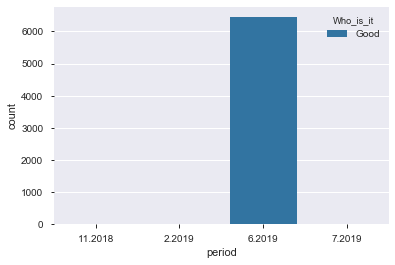

In [89]:
sns.countplot(x="period",hue="Who_is_it",data=dta_bt)

### 5)Determine a target's risk

In [90]:
data_browser[:3]

,ip_addr,user_agent,Bot_data,sec_lvl_domn,device_type,operating_sys,period,Browser,Who_is_it
0,6984db784d5c2b12af23ed7dbccb5511a4038b9da629b0...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,0,Unknown,MOBILEPHONE,IOS_12.1.4,6.2019,Mobile Safari,People
1,7e34597f49144ed22808eaa80aeb8602bb455df0df5e65...,MOZILLA/5.0 (LINUX; ANDROID 6.0.1; SM-N910F) A...,0,VIRGINM.NET,MOBILEPHONE,ANDROID_6.0.1,6.2019,Chrome Mobile,People
2,790f5c5ea63b56f9ebdd33cf8c6b4e4449c1834dad128c...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64; RV:5...,0,GC-GRUPPE.DE,Unknown,MICROSOFT_WINDOWS10,6.2019,Firefox,People


In [91]:
sec = data_browser.pivot_table(index="sec_lvl_domn", columns='Who_is_it', aggfunc='size', fill_value=0).reset_index()
sec.sort_values("Bad",ascending=False)[:7]

Who_is_it,sec_lvl_domn,Bad,Good,People
19568,YAHOO.COM,35,0,59
15957,SPMODE.NE.JP,15,11,541
1447,AU-NET.NE.JP,12,3,724
1833,BBTEC.NET,12,9,597
4768,DION.NE.JP,7,15,441
18557,Unknown,6,1892,77823
12817,OPENMOBILE.NE.JP,3,0,77


# Detection
The Bad bot can be detected using:
* Frequent high visit with unknown browser & improper user agent
